### Erroen kokaeraren teknikan oinarritutako diseinua (diskretua)

Planta, berrelikadura unitariarekin

$G(s) = \frac{1}{(s+1)(s+2)}$

Espezifikazioak:

- Gaindiketa %10 baino txikiago

- Puntako denbora 1s

Inplementazioa diskretua izango da. Espezifikazioak landu daitezke s planoan, gero z planora pasatzeko. 

Bestalde, laginketa peridoa aukeratu behar da. Oinarria puntako denbora izan daiteke

$T_s=\frac{T_1}{15}$

In [9]:
s=%s;z=%z;
g=1/(s+1)/(s+2)

// Gaindiketa %10
d=0.6;

T1=1;

Ts=T1/15;

gz=ss2tf(dscr(g,Ts))

   g  = 
       1       
   ----------  
   2 +3s +s^2  
         WARNING: dscr: Input argument 1 is assumed continuous time.
 gz  = 
     0.0019456 +0.0020797z     
   --------------------------  
   0.8187308 -1.8106803z +z^2  


Polo nagusien aukeraketa lortzeko espezifikazioak eta Erroen Kokaeraren azterketa (kontrol proportzionala erabiliz)

           z0  = 
   0.8359602 + 0.1776888i
      

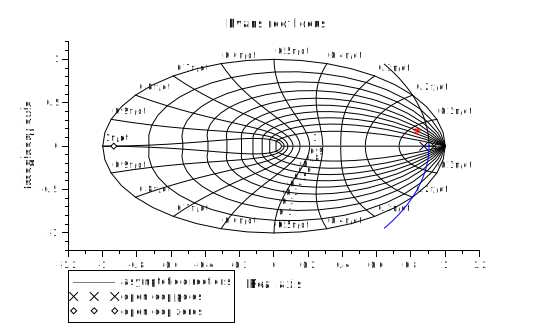

In [4]:
%plot inline
//T1=%pi/wd

wd=%pi/T1;

//wd=wn*sqrt(1-d^2)

wn=wd/sqrt(1-d^2);
s0=-d*wn+wn*sqrt(d^2-1);

z0 = exp(s0*Ts)
//z0 in EK

scf(1);clf()
evans(gz,250)
zgrid()
plot(real(z0),imag(z0),'*r')

EKn ikusten da polo desiratua hurrun dagoela eta zero baten bitartez (PD bat) adarrak erakarri ahal dira, punto horietatik pasatzeko

Emulazio teknika erabiltzeko diseinua jarraitua izan daiteke
$PD = K_p (1+ T_d s)$


- Erabiltzen da fase baldintza $T_d$ kalkulatzeko, ikusiz ze fasea gehitu behar den $s_0$ puntuan.

- Gero, modulu baldintza erabiltzen da $K_p$ kalkulatzeko.

  db  = 
  -20.683620
 phi  = 
   150.18204
     Td  = 
   0.1275878
    db  = 
  -22.555864
 phi  = 
   180.
       Kp  = 
   13.421257
     gitxia  = 
     13.421257 +1.712389s     
   -------------------------  
   15.421257 +4.712389s +s^2  
  
  "Polo desiratua"

  -2.3561945 + 3.1415927i
 
  "Begizta itxiko poloak"

  -2.3561945 + 3.1415927i
  -2.3561945 - 3.1415927i


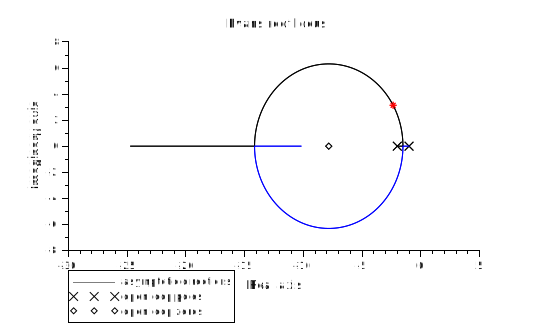

In [7]:
%plot inline
[db,phi]=dbphi(horner(g,s0))

// Behar den fasea, fase baldintza lortzeko
pha=(180-phi)*%pi/180;
Td=1/(imag(s0)/tan(pha)-real(s0))

// Konprobazioa
[db,phi]=dbphi(horner((1+Td*s)*g,s0))

evans((1+Td*s)*g,250)
plot(real(s0),imag(s0),'*r')

// Moldulu baldintza lortzeko
Kp=1/abs(horner((1+Td*s)*g,s0))

pd=(1+Td*s);

gitxia=((Kp*pd*g)/.(1))

disp('Polo desiratua',s0)
disp('Begizta itxiko poloak',roots(gitxia.den))

Orain, Euler hurbilketa erabili daiteke

$s=\frac{(1-z^{-1})}{T_s}$

Scilab-en 'horner' funtzioa erabili ahal dugu

In [11]:
pdz=horner(pd,(1-z^(-1))/Ts)
gitxiaz=((Kp*pdz*gz)/.(1))

  pdz  = 
   -1.9138174 +2.9138174z  
   ----------------------  
             z             
  gitxiaz  = 
      -0.0499731 +0.0226666z +0.08133z^2      
   -----------------------------------------  
   -0.0499731 +0.8413974z -1.7293503z^2 +z^3  


In [ ]:
Denbora eremuko erantzuna (jarraitua eta diskretua konparatzeko)

    WARNING: csim: Input argument #1 is assumed continuous time.
   

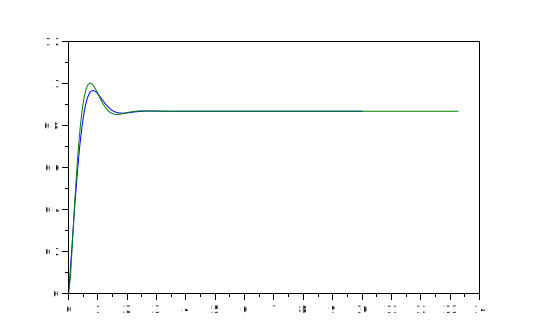

In [15]:
r=ones(1,200);
t=0:0.01:10;
tz=(0:199)*Ts;
y=csim('step',t,gitxia);
// Behar da 'ss', ez 'tf'
yz=dsimul(tf2ss(gitxiaz),r);
plot(t,y,tz,yz)

Emaitza ez da izan txarra. Hobetu daiteke $T_s$ are txikiago izateko


####  Diseinua zuzenean diskretuan

Oso antzeko bidea jarraitu daiteke, baina $z$ planoan, erabiliz $z_0$.

- PD diskretua (Euler hurbilketa erabiliz)

$PD(z)=K_p \left(1+T_d\frac{(1-z^{-1})}{Ts}\right)$

Espresio hau aldatu daiteke, sinplifikatzeko

$PD(z)=K_p(\frac{z-a}{z})$

Ohartu beheko $z$ eraman daitekeela plantara, bere fase gehipena kontutan hartzeko eta, gero $(z_0-a)$ fasea kalkulatzen da, hau da, $a$-ren balioa fase baldintza betetzeko.

In [18]:
[db,phi]=dbphi(horner(gz/z,z0));
pha=(180-phi)*%pi/180

a=real(z0)-imag(z0)/tan(pha)

   phi  = 
   132.02422
  pha  = 
   0.8373354
   a  = 
   0.6758324


Fase baldintza bete dela konprobatzen da, moldulu baldintza erbili $K_p$ kalkulatzeko eta denbora eremuko kalkulua egin.

  
   180.
                
   0.8233225 + 0.1914865i
   0.8233225 - 0.1914865i
   0.0770068 + 0.i       
 
   0.8359602 + 0.1776888i
     

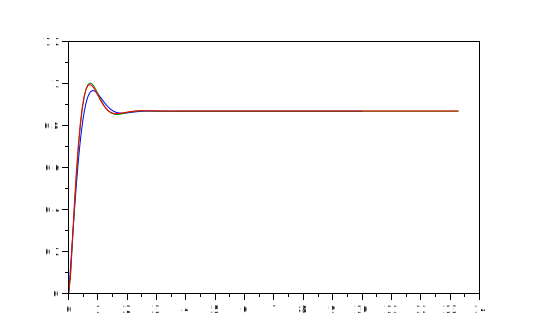

In [28]:
[db,phi]=dbphi(horner((z-a)/z*gz,z0));
disp(phi)

// EK erabiliz ere kalkulatu daiteke Kp
//evans((z-a)/z*g,250)
//zgrid()
//plot(real(z0),imag(z0),'*r')

pdz1=(z-a)/z;

// Molulu baldintza

Kp1=1/abs(horner((z-a)*gz,z0));

// Begitza itxia berria
gitxiaz1=((Kp1*pdz1*gz)/.(1));

disp(roots(gitxiaz1.den))
disp(z0)

// Denbora eremua
yz1=dsimul(tf2ss(gitxiaz1),r);

plot(t,y,tz,yz,tz,yz1)


Amaitzeko kontrolseinalea lortu daiteke. Orain kate zuzenean kontrolagailua dago eta berrelikaduran planta.

Kontrol seinalea kalkulatzeko kontrol sistema kausala izan behar da. Bertsio diskretuak biak dira, ez dago arazorik (egin den bezala eginda).

Bertsio jarraitua aldatu beharko zen:

$PD(s)=K_p(1+\frac{T_d s}{1+s/100})$

adibidez ...

            

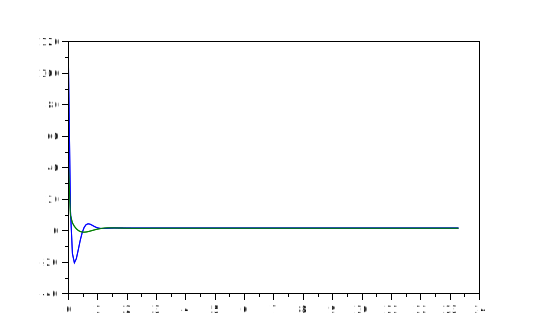

In [32]:
%plot inline
// kontrol diskretua (emulazioa)

uitxiaz=((Kp*pdz)/.(gz));

// kontrol diskretua (diseinu diskretua)

uitxiaz1=((Kp1*pdz1)/.(gz));

uz=dsimul(tf2ss(uitxiaz),r);
uz1=dsimul(tf2ss(uitxiaz1),r);

plot(tz,uz,tz,uz1)